In [242]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [243]:
df = pd.DataFrame()

In [244]:
df['x1'] = [1,2,3,4,5,6,7,8,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [245]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,1
8,9,9,0
9,9,2,0


In [246]:
df.shape

(10, 3)

<Axes: xlabel='x1', ylabel='x2'>

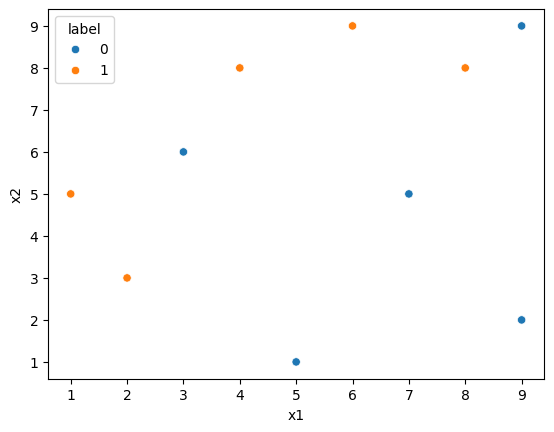

In [247]:
import seaborn as sns
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['label'])

In [248]:
df['weights'] = 1/ df.shape[0]

In [249]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [250]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


### Creating Decision Stumps

In [251]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [252]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [253]:
df.iloc[:,2].values

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [254]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

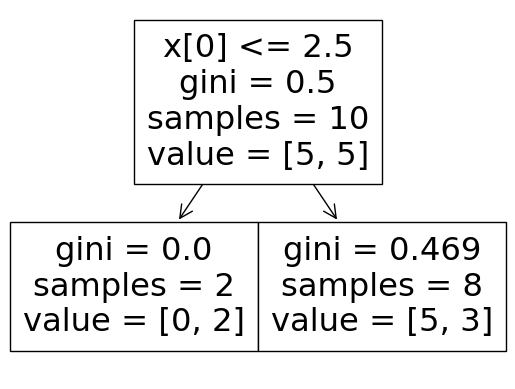

In [255]:
plot_tree(dt1)

<Axes: >

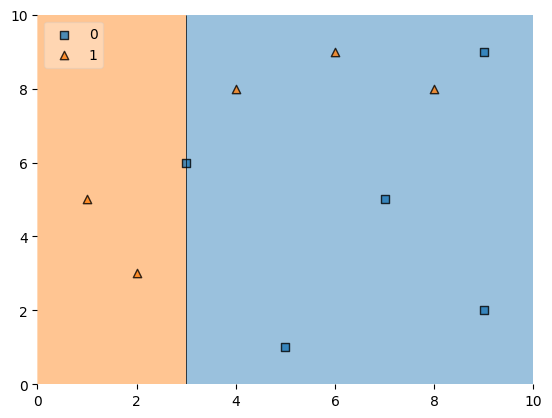

In [256]:
plot_decision_regions(X,y, dt1, legend=2)

In [257]:
df['y_pred'] = dt1.predict(X)

In [258]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,7,5,0,0.1,0
7,8,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [259]:
error = 0
for i, row in df.iterrows():
    error += row['weights'] if row['y_pred'] != row['label'] else 0


In [260]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,7,5,0,0.1,0
7,8,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [261]:
error = 0.3

In [262]:
alpha1 = 1/2*(np.log((1-error) / error))

In [263]:
alpha1

0.42364893019360184

In [264]:
def update_weight(row):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha1)
    else:
        return row["weights"] * np.exp(alpha1)

In [265]:
df["updated_weight"] = df.apply(update_weight, axis=1)

In [266]:
df

,x1,x2,label,weights,y_pred,updated_weight
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,0,0.152753
6,7,5,0,0.1,0,0.065465
7,8,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [267]:
df['normalized_weights'] = df['updated_weight'] / df['updated_weight'].sum()

In [268]:
df

,x1,x2,label,weights,y_pred,updated_weight,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,7,5,0,0.1,0,0.065465,0.071429
7,8,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [269]:
df["normalized_weights"].sum()

0.9999999999999999

In [270]:
df["cumsum_upper"] = np.cumsum(df["normalized_weights"])

In [272]:
df["cumsum_lower"] = df["cumsum_upper"] - df['normalized_weights']

In [273]:
df

,x1,x2,label,weights,y_pred,updated_weight,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,0,0.065465,0.071429,0.214286,0.142857
3,4,8,1,0.1,0,0.152753,0.166667,0.380952,0.214286
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,0,0.152753,0.166667,0.619048,0.452381
6,7,5,0,0.1,0,0.065465,0.071429,0.690476,0.619048
7,8,8,1,0.1,0,0.152753,0.166667,0.857143,0.690476
8,9,9,0,0.1,0,0.065465,0.071429,0.928571,0.857143
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [274]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_lower'] < a and a < row['cumsum_upper']:
                indices.append(index)
    return indices

In [288]:
row_indices = create_new_dataset(df)

In [289]:
row_indices

[6, 5, 7, 5, 5, 7, 6, 8, 3, 8]

In [290]:
df2 = df.iloc[row_indices,[0,1,2,3]]
df2

,x1,x2,label,weights
6,7,5,0,0.1
5,6,9,1,0.1
7,8,8,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
7,8,8,1,0.1
6,7,5,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1


In [291]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = df2.iloc[:, 0:2].values
y = df2.iloc[:, 2].values
dt2.fit(X, y)


DecisionTreeClassifier(max_depth=1)

<Axes: >

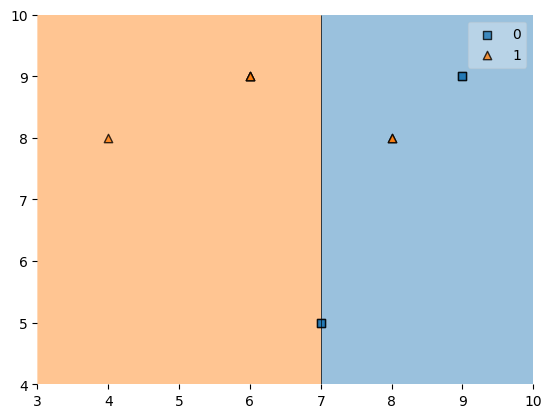

In [292]:
plot_decision_regions(X,y,dt2)

In [293]:
df2["y_pred"] = dt2.predict(X)

In [294]:
error = 0
for i, row in df2.iterrows():
    error += row["weights"] if row["y_pred"] != row["label"] else 0

In [295]:
error

0.2

In [297]:
alpha2 = 1 / 2 * (np.log((1 - error) / error))
alpha2

0.6931471805599453

In [298]:
def update_weight(row):
    if row["label"] == row["y_pred"]:
        return row["weights"] * np.exp(-alpha2)
    else:
        return row["weights"] * np.exp(alpha2)


df2["updated_weight"] = df2.apply(update_weight, axis=1)

In [299]:
df2["normalized_weights"] = df2["updated_weight"] / df2["updated_weight"].sum()

In [301]:
df2

,x1,x2,label,weights,y_pred,updated_weight,normalized_weights
6,7,5,0,0.1,0,0.05,0.0625
5,6,9,1,0.1,1,0.05,0.0625
7,8,8,1,0.1,0,0.20,0.2500
5,6,9,1,0.1,1,0.05,0.0625
5,6,9,1,0.1,1,0.05,0.0625
7,8,8,1,0.1,0,0.20,0.2500
6,7,5,0,0.1,0,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625
3,4,8,1,0.1,1,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625


In [303]:
df2["cumsum_upper"] = np.cumsum(df2["normalized_weights"])
df2["cumsum_lower"] = df2["cumsum_upper"] - df2["normalized_weights"]

In [304]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row["cumsum_lower"] < a and a < row["cumsum_upper"]:
                indices.append(index)
    return indices

In [305]:
row_indices = create_new_dataset(df2)

In [306]:
df3 = df2.iloc[row_indices, [0, 1, 2, 3]]
df3

,x1,x2,label,weights
8,9,9,0,0.1
7,8,8,1,0.1
6,7,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
7,8,8,1,0.1
7,8,8,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1


<Axes: >

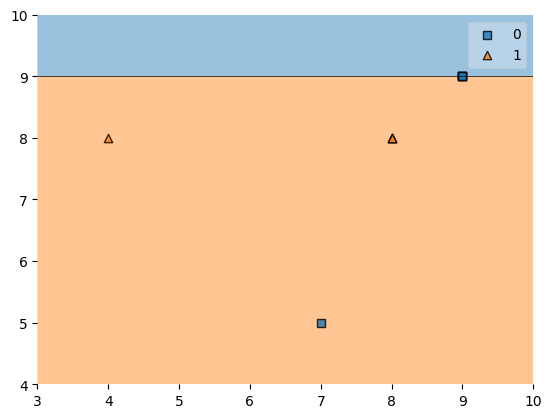

In [307]:
dt3 = DecisionTreeClassifier(max_depth=1)
X = df3.iloc[:, 0:2].values
y = df3.iloc[:, 2].values
dt3.fit(X, y)
plot_decision_regions(X, y, dt3)

In [308]:
df3["y_pred"] = dt3.predict(X)
error = 0
for i, row in df3.iterrows():
    error += row["weights"] if row["y_pred"] != row["label"] else 0

print(error)
alpha3 = 1 / 2 * (np.log((1 - error) / error + 0.0000001))
print(alpha3)

0.1
1.0986122942236651


In [309]:
def update_weight(row):
    if row["label"] == row["y_pred"]:
        return row["weights"] * np.exp(-alpha2)
    else:
        return row["weights"] * np.exp(alpha2)


df3["updated_weight"] = df3.apply(update_weight, axis=1)

In [ ]:
df3["normalized_weights" ] = df3["updated_weight"] / df3["updated_weight"].sum()

# Prediction

In [374]:
query = np.array([3,6]).reshape(1,2)

In [367]:
dt1.predict(query)

array([1], dtype=int64)

In [368]:
dt2.predict(query)

array([1], dtype=int64)

In [369]:
dt3.predict(query)[0]

1

In [370]:
alpha2 * dt2.predict(query)

array([0.69314718])

In [371]:
alpha1 * 0 + alpha2 *0 + alpha3*1

1.0986122942236651

In [375]:
# alpha1 * 1 + alpha2 *1 + alpha3*1
np.sign((alpha1 * dt1.predict(query)[0]) + (alpha2 * dt2.predict(query)[0]) + (alpha3 * dt3.predict(query)[0]))

1.0

In [373]:
np.sign(1.0986122942236651)

1.0

In [ ]:
np.sign(
    (alpha1(dt1.predict(query)) + alpha2(dt2.predict(query)) + alpha3(dt3.predict(query)))
)